# Mini-Challenge Michelle Rohrer Part 2

>Meine Reise geht nun von der Normandie Richtung Amiens weiter auf die Supermoto-Strecke. Dort habe ich das Motorrad von meinem Freund und mir gefilmt. 
Supermoto ist in Frankreich ein sehr bekannter Sport, Frankreich wurde dieses Jahr zum zwölften Mal in Folge Weltmeister.

>Ein grosses Thema in der Supermoto Szene ist es, welcher Motor der beste ist (2-Takter vs. 4-Takter). So gibt es diese Diskussionen auch bei mir und meinem Freund, denn er fährt eine 450er 4-Takter und ich eine 250er 2-Takter. Ein grosser Unterschied dieser Motoren ist der Sound, beziehungsweise zündet der 2-Takter bei jedem zweiten Takt und der 4-Takter bei jedem vierten (1-Takt = Kolben ist einmal hoch und runter gefahren). Ich möchte mich also nun mit den Unterschieden der beiden Sounds beschäftigen und ob man die Unterschiede der Takte erkennt.

In [17]:
import librosa
import sounddevice as sd

# Lade die Audio
audio_4, sample_rate_4 = librosa.load('audio_4.mp3', sr=None)

# Abspielen
sd.play(audio_4, samplerate=sample_rate_4)

# Warte, bis das Abspielen abgeschlossen ist
sd.wait()

In [18]:
# Lade die Audio
audio_2, sample_rate_2 = librosa.load('audio_2.mp3', sr=None)

# Abspielen
sd.play(audio_2, samplerate=sample_rate_2)

# Warte, bis das Abspielen abgeschlossen ist
sd.wait()

#### Experiment 1

>In meinem ersten Experiment konzentriere ich mich auf die Analyse der Waveform, um die Unterschiede zwischen den beiden Motortypen zu untersuchen. Mein Ziel ist es, die charakteristischen Merkmale der 2-Takt- und 4-Takt-Motoren herauszuarbeiten. Dazu verwende ich die Fouriertransformation, um die Frequenzkomponenten beider Motoren zu analysieren, und die Hüllkurvenanalyse, um ihre Energieverteilung im Zeitbereich sichtbar zu machen.

(der Test wurde mit ChatGPT bearbeitet)

Die Fouriertransformation zeigt an, welche Frequenzen dominant in einem Signal sind.

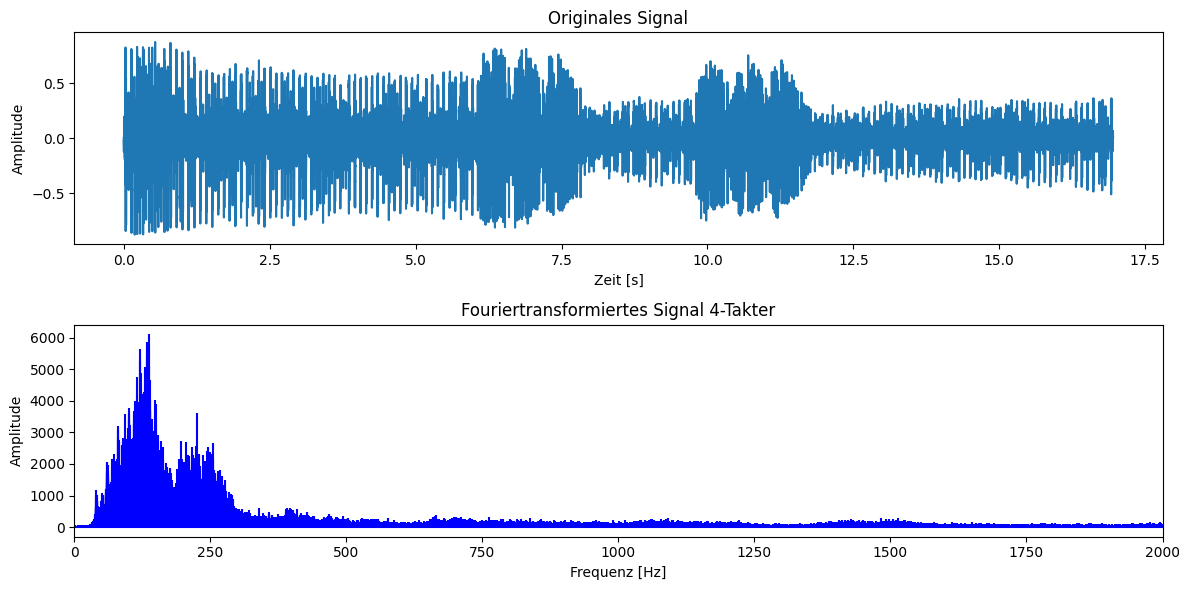

In [19]:
# Fouriertransformation 4-Takter
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

# Fourier-Transformation
time_array = np.linspace(0, len(audio_4) / sample_rate_4, num=len(audio_4))
signal_fft = fft(audio_4)
frequencies = fftfreq(len(audio_4), 1 / sample_rate_4)

# Amplituden anzeigen
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_array, audio_4)
plt.title('Originales Signal')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.stem(frequencies, np.abs(signal_fft), 'b', markerfmt=" ", basefmt="-b")
plt.title('Fouriertransformiertes Signal 4-Takter')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude')
plt.xlim(0, 2000)

plt.tight_layout()
plt.show()

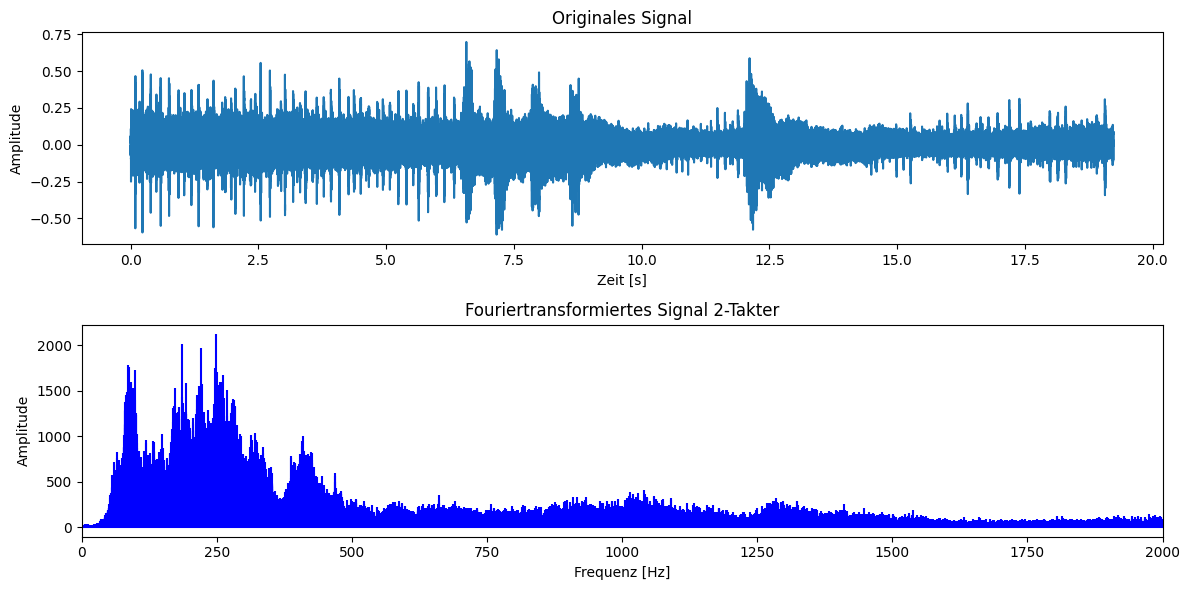

In [20]:
# Fouriertransformation 2-Takter
time_array = np.linspace(0, len(audio_2) / sample_rate_2, num=len(audio_2))
signal_fft = fft(audio_2)
frequencies = fftfreq(len(audio_2), 1 / sample_rate_2)

# Amplituden anzeigen
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_array, audio_2)
plt.title('Originales Signal')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.stem(frequencies, np.abs(signal_fft), 'b', markerfmt=" ", basefmt="-b")
plt.title('Fouriertransformiertes Signal 2-Takter')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude')
plt.xlim(0, 2000)

plt.tight_layout()
plt.show()

>Beim Vergleich der Fouriertransformierten von 2-Takt- und 4-Takt-Motoren zeigen sich deutliche Unterschiede in den Frequenzspektren. Das Spektrum des 2-Takt-Motors weist intensivere Spitzen in niedrigeren Frequenzbereichen (bis etwa 250 Hz) auf, was auf eine höhere Anzahl von Zündungen pro Umdrehung hindeutet, während das 4-Takt-Spektrum ebenfalls bei niedrigeren Frequenzen aktiv ist, aber weniger ausgeprägte Amplituden und insgesamt eine gleichmäßigere Verteilung zeigt.

Im Gegensatz zu der Fouriertransformation zeigt die Amplitude der Hüllkurvenanalyse wie laut/intensiv das Signal zu einem bestimmten Zeitpunk ist.
Ich werde die Hüllkurvenanalyse in Bezug auf das Standgas analysieren, um zu schauen, wie sich die Motoren im Standgas unterscheiden.

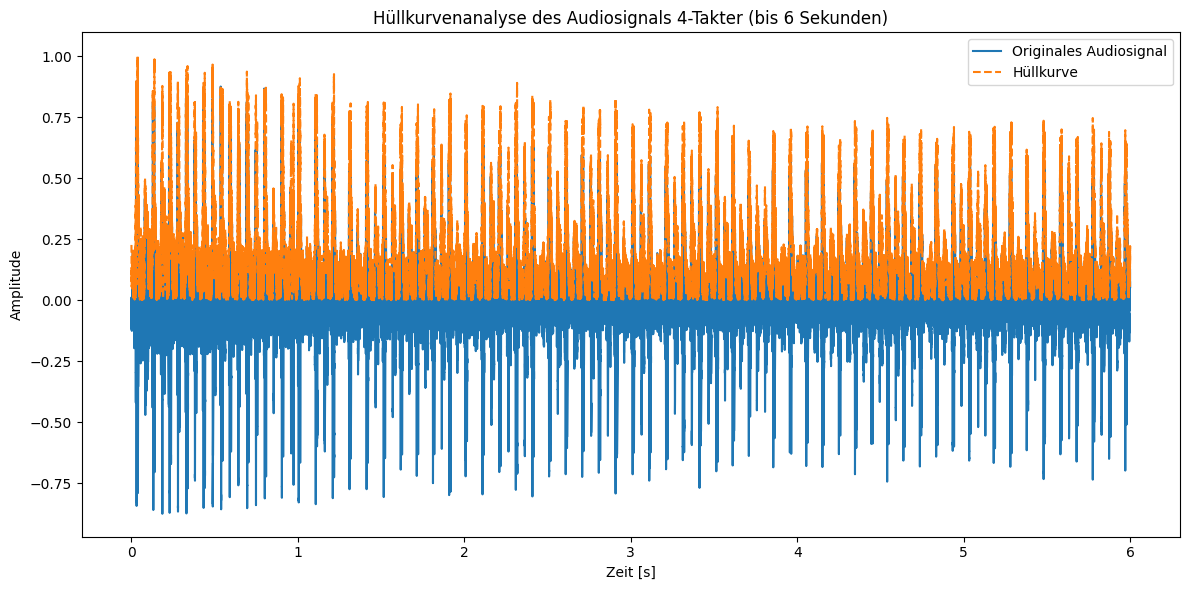

In [21]:
# Hüllkurvenanalyse 4-Takter
import scipy.signal as signal

# die ersten 6 Sekunden
max_time = 6
max_samples = int(max_time * sample_rate_4)
audio_4_trimmed = audio_4[:max_samples]

# Hüllkurve
t = np.linspace(0, max_time, len(audio_4_trimmed))
analytic_signal = signal.hilbert(audio_4_trimmed)
envelope = np.abs(analytic_signal)

# Plotten
plt.figure(figsize=(12, 6))

plt.plot(t, audio_4_trimmed, label='Originales Audiosignal')
plt.plot(t, envelope, label='Hüllkurve', linestyle='--')
plt.title('Hüllkurvenanalyse des Audiosignals 4-Takter (bis 6 Sekunden)')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

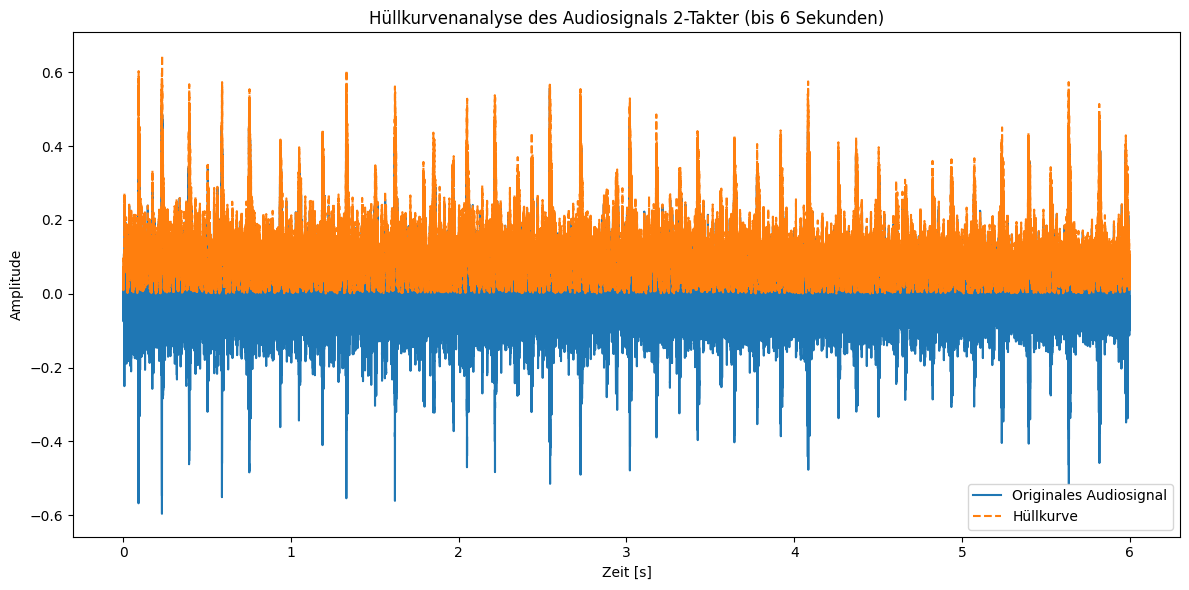

In [22]:
# Hüllkurvenanalyse 2-Takter
# die ersten 6 Sekunden
max_time = 6
max_samples = int(max_time * sample_rate_2)
audio_2_trimmed = audio_2[:max_samples]

# Hüllkurve
t = np.linspace(0, max_time, len(audio_2_trimmed))
analytic_signal = signal.hilbert(audio_2_trimmed)
envelope = np.abs(analytic_signal)

# Plotten
plt.figure(figsize=(12, 6))

plt.plot(t, audio_2_trimmed, label='Originales Audiosignal')
plt.plot(t, envelope, label='Hüllkurve', linestyle='--')
plt.title('Hüllkurvenanalyse des Audiosignals 2-Takter (bis 6 Sekunden)')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

>Bei der Hüllkurvenanalyse zeigt sich, dass der 4-Takt-Motor eine gleichmäßigere und höhere Hüllkurve aufweist, was auf regelmäßige und stärkere Zündimpulse hinweist. Der 2-Takt-Motor hat hingegen eine niedrigere und ungleichmäßigere Hüllkurve, was auf die häufigeren, aber weniger intensiven Zündungen hinweist.

#### Experiment 2                                                                           

>Zusätzlich vergleiche ich die beiden Motoren durch eine detaillierte Phasenanalyse, die sowohl eine Phasenspektralanalyse als auch eine Interferenzanalyse umfasst. Diese Untersuchungen sollen aufzeigen, in welchen Frequenzbereichen die Motoren betrieben werden und welche Phaseneigenschaften sie aufweisen. Anhand dieser Erkenntnisse möchte ich schließlich ableiten, welche Vor- und Nachteile sich aus den spezifischen Eigenschaften der beiden Motortypen ergeben.

(der Test wurde mit ChatGPT bearbeitet)

Die Phasenspektralanalyse untersucht, wann die Schwingungen im Vergleich zu einem festen Referenzpunkt anfangen. Jede Frequenz im Signal hat eine bestimmte Phase, die beschreibt, ob der Beginn dieser Schwingung etwas früher oder später kommt.

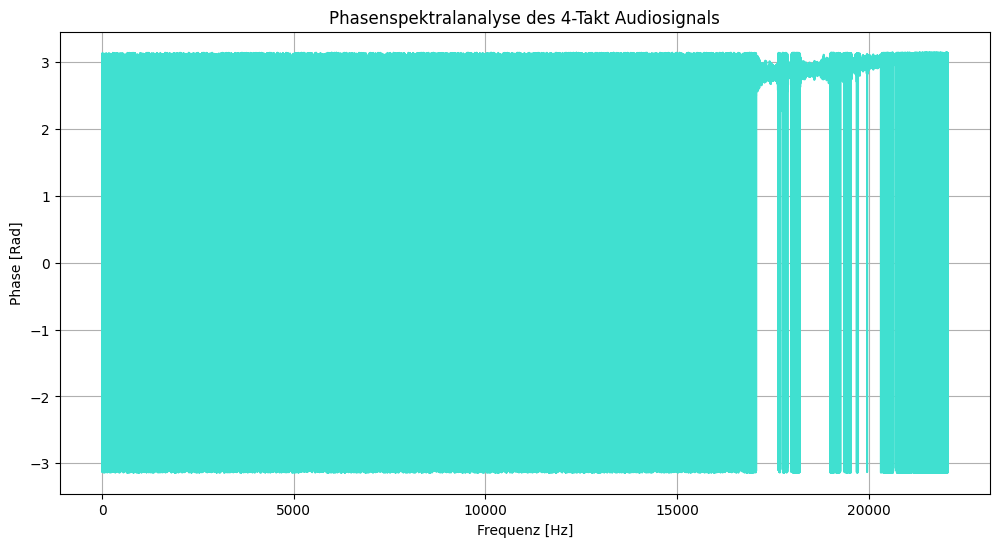

In [23]:
# Phasenspektralanalyse 4-Takter
N = len(audio_4)
signal_fft = fft(audio_4)
frequencies = np.fft.fftfreq(N, d=1/sample_rate_4)

# Phasenwinkel
phases = np.angle(signal_fft)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:N // 2], phases[:N // 2], color='turquoise')
plt.title('Phasenspektralanalyse des 4-Takt Audiosignals')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Phase [Rad]')
plt.grid()
plt.show()

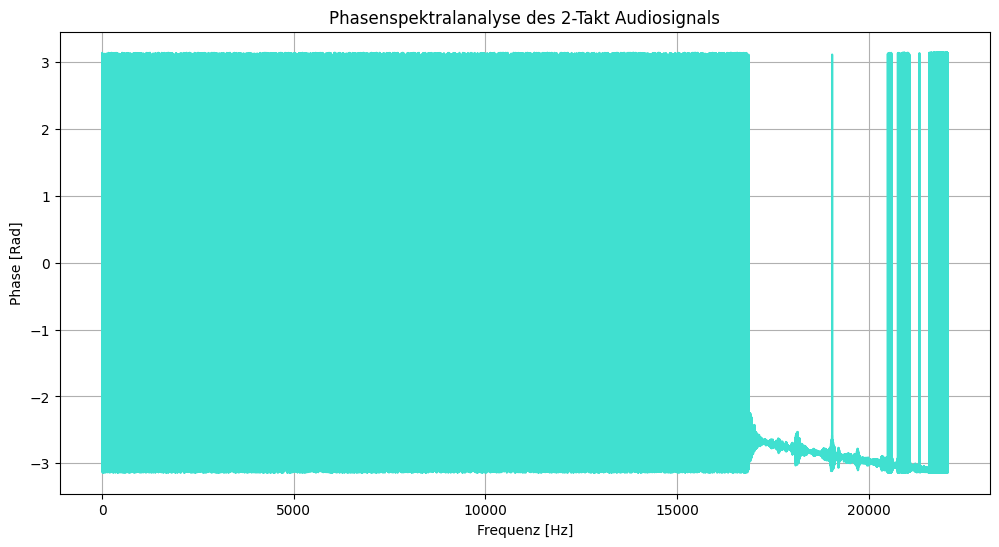

In [24]:
# Phasenspektralanalyse 2-Takter
N = len(audio_2)
signal_fft = fft(audio_2)
frequencies = np.fft.fftfreq(N, d=1/sample_rate_2)

# Phasenwinkel
phases = np.angle(signal_fft)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:N // 2], phases[:N // 2], color='turquoise')
plt.title('Phasenspektralanalyse des 2-Takt Audiosignals')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Phase [Rad]')
plt.grid()
plt.show()

>Bei beiden Aufnahmen ist zu erkennen, dass das Signal im niedrigen Frequenzbereich relativ stabil bleibt, was auf ein konstantes Standgas hinweist. Gegen Ende der Analyse treten bei höheren Frequenzen deutliche Schwankungen auf, was mit dem Gas geben übereinstimmt. Diese Veränderungen in der Phase deuten auf eine Erhöhung der Drehzahl hin, die sich klar in beiden Diagrammen widerspiegelt.

Als nächsten Schritt werde ich die Phase modifizieren, um gezielt konstruktive und destruktive Interferenzen zu erzeugen und dadurch die Unterschiede in der Klangcharakteristik besser hörbar zu machen.

Phasenverschiebung für Zweitaktmotor:
Playing audio with phase shift: 0 degrees for Zweitaktmotor


Playing audio with phase shift: 90 degrees for Zweitaktmotor


Playing audio with phase shift: 180 degrees for Zweitaktmotor


Phasenverschiebung für Viertaktmotor:
Playing audio with phase shift: 0 degrees for Viertaktmotor


Playing audio with phase shift: 90 degrees for Viertaktmotor


Playing audio with phase shift: 180 degrees for Viertaktmotor


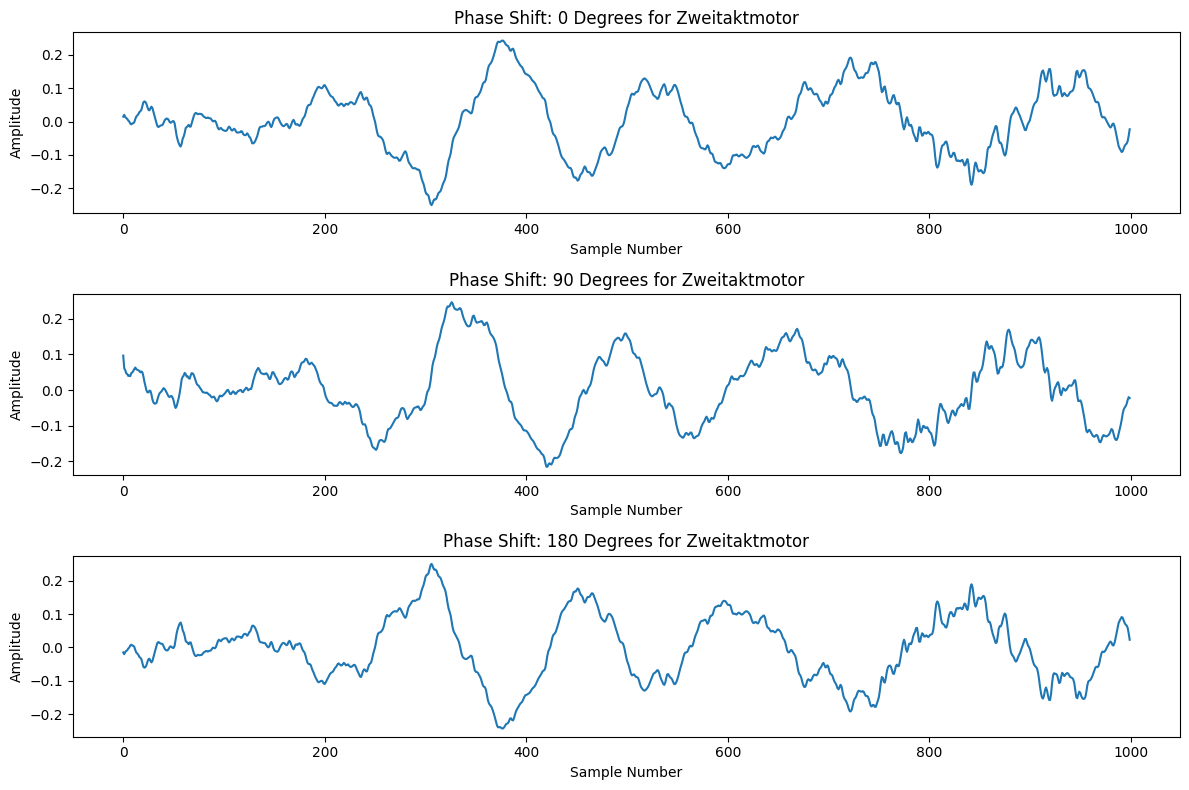

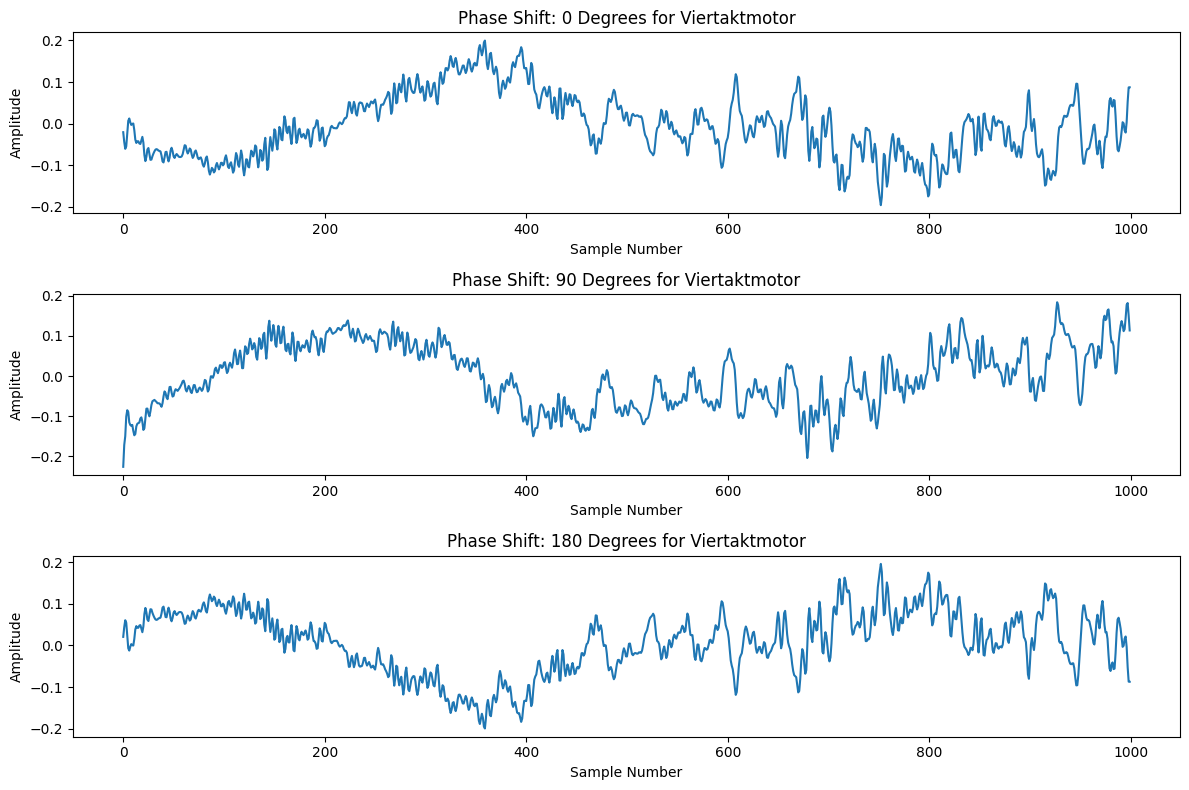

In [25]:
from scipy.signal import hilbert
from scipy.io.wavfile import write
from IPython.display import Audio, display

# Funktion zur Anwendung der Phasenverschiebung auf ein Signal
def apply_phase_shift(signal, shift_degrees):
    shift_radians = np.deg2rad(shift_degrees)
    analytic_signal = hilbert(signal)  # Berechne das analytische Signal
    shifted_signal = np.real(analytic_signal * np.exp(1j * shift_radians))  # Wende die Phasenverschiebung an
    return shifted_signal

# Definiere die Dauer der Audio-Clips in Sekunden
clip_duration = 6  # die ersten 6 Sekunden

# Berechne die Anzahl der Samples, die den ersten 6 Sekunden entsprechen
num_samples = clip_duration * sample_rate_2

# Kürze die Signale auf die ersten 6 Sekunden
signal_1 = audio_2[:num_samples]  # Verwende die ersten 6 Sekunden von Signal 1 (Zweitakt)
signal_2 = audio_4[:num_samples]  # Verwende die ersten 6 Sekunden von Signal 2 (Viertakt)

# Erzeuge eine Serie von Phasenverschiebungen
phase_shifts = [0, 90, 180]  # Verschiedene Phasenverschiebungen in Grad

# Phasenverschiebung auf das erste Signal (Zweitaktmotor) anwenden und Ergebnisse speichern
print("Phasenverschiebung für Zweitaktmotor:")
for shift in phase_shifts:
    shifted_signal_1 = apply_phase_shift(signal_1, shift)
    output_filename = f"zweite_phase_shift_{shift}.wav"
    write(output_filename, sample_rate_2, (shifted_signal_1 * 32767).astype(np.int16))  # Skaliere auf int16 Bereich
    print(f"Playing audio with phase shift: {shift} degrees for Zweitaktmotor")
    display(Audio(output_filename))

# Phasenverschiebung auf das zweite Signal (Viertaktmotor) anwenden und Ergebnisse speichern
print("Phasenverschiebung für Viertaktmotor:")
for shift in phase_shifts:
    shifted_signal_2 = apply_phase_shift(signal_2, shift)
    output_filename = f"viertakt_phase_shift_{shift}.wav"
    write(output_filename, sample_rate_2, (shifted_signal_2 * 32767).astype(np.int16))  # Skaliere auf int16 Bereich
    print(f"Playing audio with phase shift: {shift} degrees for Viertaktmotor")
    display(Audio(output_filename))

# Optional: Visualisiere die Signalformen, um den Einfluss der Phasenverschiebung zu sehen
plt.figure(figsize=(12, 8))
for i, shift in enumerate(phase_shifts):
    shifted_signal_1 = apply_phase_shift(signal_1, shift)
    plt.subplot(len(phase_shifts), 1, i + 1)
    plt.plot(shifted_signal_1[:1000])  # Zeichne die ersten 1000 Samples zur besseren Übersicht
    plt.title(f'Phase Shift: {shift} Degrees for Zweitaktmotor')
    plt.xlabel('Sample Number')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, shift in enumerate(phase_shifts):
    shifted_signal_2 = apply_phase_shift(signal_2, shift)
    plt.subplot(len(phase_shifts), 1, i + 1)
    plt.plot(shifted_signal_2[:1000])  # Zeichne die ersten 1000 Samples zur besseren Übersicht
    plt.title(f'Phase Shift: {shift} Degrees for Viertaktmotor')
    plt.xlabel('Sample Number')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Der Code wurde mit Copilot verbessert und angepasst

>Die Experimente verdeutlichen, dass der 2-Takt Motor durch seine gleichmäßigere Frequenzstruktur weniger empfindlich auf Phasenverschiebungen reagiert, während der 4-Takt Motor aufgrund seines komplexeren harmonischen Spektrums empfindlicher auf solche Änderungen reagiert.

#### Auswertung Experiment 1

Um mein Experiment zu bestätigen, werde ich die statistischen Zahlen der beiden Motoren untersuchen und verlgeichen.

In [26]:
import pandas as pd
# statistische Kennwerte
def berechne_statistische_kennwerte(audio, name):
    statistik = {
        'Name': name,
        'Mittelwert': np.mean(audio),
        'Standardabweichung': np.std(audio),
        'Varianz': np.var(audio),
        'Maximum': np.max(audio),
        'Minimum': np.min(audio),
        'Median': np.median(audio),
        'Kurtosis': pd.Series(audio).kurtosis(),
        'Skewness': pd.Series(audio).skew()
    }
    return statistik

# Dataframe
statistiken_zweitakt = berechne_statistische_kennwerte(audio_2, 'Zweitaktmotor')
statistiken_viertakt = berechne_statistische_kennwerte(audio_4, 'Viertaktmotor')

df_statistiken = pd.DataFrame([statistiken_zweitakt, statistiken_viertakt])

# Anzeige des DataFrames
print(df_statistiken)

            Name  Mittelwert  Standardabweichung   Varianz   Maximum  \
0  Zweitaktmotor    0.000006            0.077945  0.006075  0.698884   
1  Viertaktmotor    0.000007            0.167944  0.028205  0.876253   

    Minimum    Median  Kurtosis  Skewness  
0 -0.610567 -0.000405  4.031191  0.010976  
1 -0.874507 -0.002904  3.685966 -0.220161  


>Die statistische Analyse zeigt, dass der 4-Takter eine höhere Standardabweichung (0.1679) und Varianz (0.0282) im Vergleich zum 2-Takter hat, was auf eine größere Streuung und Variabilität in den Signalen hindeutet. Beide Motoren haben einen ähnlichen Mittelwert nahe null, aber der Zweitaktmotor erreicht höhere Extremwerte (Maximum 0.8763 und Minimum -0.8745) als der Viertaktmotor. Die Kurtosis-Werte sind bei beiden Motoren ähnlich und weisen darauf hin, dass die Verteilung spitzer ist als eine Normalverteilung, wobei der 4-Takt Motor eine leicht negative Schiefe (Skewness) zeigt, während der 2-Takt Motor nahezu symmetrisch ist.

#### Ausweretung Experiment 2

Die gleichen Statistiken werde ich auch für die Phasenverschiebung machen und schauen, ob sich an den Statsitiken etwas verändert hat.

In [27]:
# Audios laden
audio_4_90, sample_rate_4_90 = librosa.load('viertakt_phase_shift_90.wav', sr=None)
audio_4_180, sample_rate_4_180 = librosa.load('viertakt_phase_shift_180.wav', sr=None)

audio_2_90, sample_rate_2_90 = librosa.load('zweite_phase_shift_90.wav', sr=None)
audio_2_180, sample_rate_2_180 = librosa.load('zweite_phase_shift_180.wav', sr=None)

In [28]:
# Dataframe
statistiken_zweitakt_90 = berechne_statistische_kennwerte(audio_2_90, 'Zweitaktmotor')
statistiken_viertakt_90 = berechne_statistische_kennwerte(audio_4_90, 'Viertaktmotor')
statistiken_zweitakt_180 = berechne_statistische_kennwerte(audio_2_180, 'Zweitaktmotor')
statistiken_viertakt_180 = berechne_statistische_kennwerte(audio_4_180, 'Viertaktmotor')

df_statistiken = pd.DataFrame([statistiken_zweitakt_90, statistiken_viertakt_90, statistiken_zweitakt_180, statistiken_viertakt_180])

# Anzeige des DataFrames
print(df_statistiken)

            Name    Mittelwert  Standardabweichung   Varianz   Maximum  \
0  Zweitaktmotor  2.100246e-07            0.094053  0.008846  0.633820   
1  Viertaktmotor -1.320583e-07            0.193246  0.037344  0.768738   
2  Zweitaktmotor -3.885524e-05            0.094053  0.008846  0.596191   
3  Viertaktmotor -1.647480e-04            0.193246  0.037344  0.874451   

    Minimum    Median  Kurtosis  Skewness  
0 -0.552246 -0.001312  2.170845 -0.016242  
1 -0.986328  0.001038  3.396003 -0.832877  
2 -0.556580  0.001343  1.754389 -0.073006  
3 -0.876221  0.002380  3.180378  0.320246  


>Die Analyse zeigt, dass die Phasenänderung die Mittelwerte der Signale näher an den Nullpunkt bringt, was auf eine Stabilisierung hindeutet. Beide Motoren weisen nach der Phasenänderung eine höhere Standardabweichung und Varianz auf, was auf eine gesteigerte Fluktuation und Instabilität, besonders beim Viertaktmotor, hinweist. Zudem sind die Kurtosis-Werte des Zweitaktmotors niedriger, was auf eine flachere Verteilung hinweist, während der Viertaktmotor eine signifikante Veränderung in der Asymmetrie zeigt, insbesondere durch eine stärkere negative Schiefe.

(Der Text wurde mit ChatGPT verbessert)

>Zusammengefasst zeigen die statistischen Daten, dass die Phasenänderung zu einer erhöhten Variabilität und Veränderung der Signalform geführt hat, wobei besonders der 4-Takter eine größere Veränderung in der Asymmetrie und Verteilung aufweist.

#### Schlusswertung

In meinen Experimenten wurden die Unterschiede zwischen den Klanggeräuschen eines 2-Takt- und 4-Takt-Motors im Kontext von Supermoto-Rennstrecken untersucht.

Im ersten Experiment habe ich die Waveform der beiden Motorgeräusche analysiert. Die Fouriertransformation zeigte, dass der 4-Takter durch seine niedrigeren Frequenzen ein ruhigeres und stabileres Laufverhalten aufweist. Der 2-Takter dagegen klingt durch seine höheren Frequenzen aggressiver und dynamischer. Die Hüllkurvenanalyse bestätigte diese Unterschiede: Der 4-Takter hat eine gleichmäßige Energieverteilung, während der 2-Takter durch stärkere Energieausschläge seine unruhigere und impulsivere Eigenschaft zeigt.

Im zweiten Experiment wurde die Phasenverschiebung untersucht. Der 4-Takter reagierte empfindlicher auf Phasenveränderungen, was auf seine geringere Toleranz gegenüber Schwankungen hinweist. In der Phasenspektralanalyse wurde bei niedriger Drehzahl kein signifikanter Unterschied sichtbar, aber bei höheren Drehzahlen zeigte der 2-Takter tiefere Phasenwerte (-3), während der 4-Takter höhere Phasenwerte (3) aufwies, was seine gleichmäßigere und kontrolliertere Leistung verdeutlicht.

Statistische Analysen bestätigen, dass der 2-Takter in höheren Frequenzen eine größere Streuung aufweist, während der 4-Takter insgesamt konstanter und stabiler arbeitet. Dies zeigt, dass der 4-Takter für beständiges Fahren besser geeignet ist, während der 2-Takter mehr Aggressivität und Flexibilität in kurzen, intensiven Fahrabschnitten bietet.

Zusammenfassend kann man sagen, dass der 2-Takter aggressiver aber auch unruhiger läuft, während der 4-Takter eine gleichmässigere Leistungsentfaltung hat. Was jetzt für die Rennstrecke besser geeignet ist, hängt jedoch von noch weiteren Faktoren ab, wie der Umweltgesetze, Lautstärkeregulation, Wartungsarbeiten, etc. Zwar hat Frankreich die Weltmeisterschaft gewonnen mit ihren 4-Takt Motoren, jedoch hat der 2-Takt Motor mein Herz gewonnen :) Ausserdem gibt mir das Experiment einige gute Grundlagen, um meinen Freund dazu zu überzeugen, dass 2-Takter einfach die besseren Motoren sind und mehr Spass machen. 

### Nyguist-Frequenz

Ich möchte nun auch die Audio von meinem Motorrad digitalisieren, um es langfrsitig und komprimiert in meinem Reisetagebuch zu speichern. Das Ziel ist es, das Signal so zu speichern, dass keine Informationen verloren gegangen sind.

In [29]:
# Nyguist-Frequenz
nyquist_freq = sample_rate_2 / 2
nyquist_freq

22050.0

In [30]:
# Downsampling 
def downsample_audio(audio, sample_rate, target_sample_rate):
    factor = int(sample_rate // target_sample_rate)
    downsampled_audio = audio[::factor]
    return downsampled_audio

audio_2_downsampled = downsample_audio(audio_2, sample_rate_2, int(nyquist_freq))

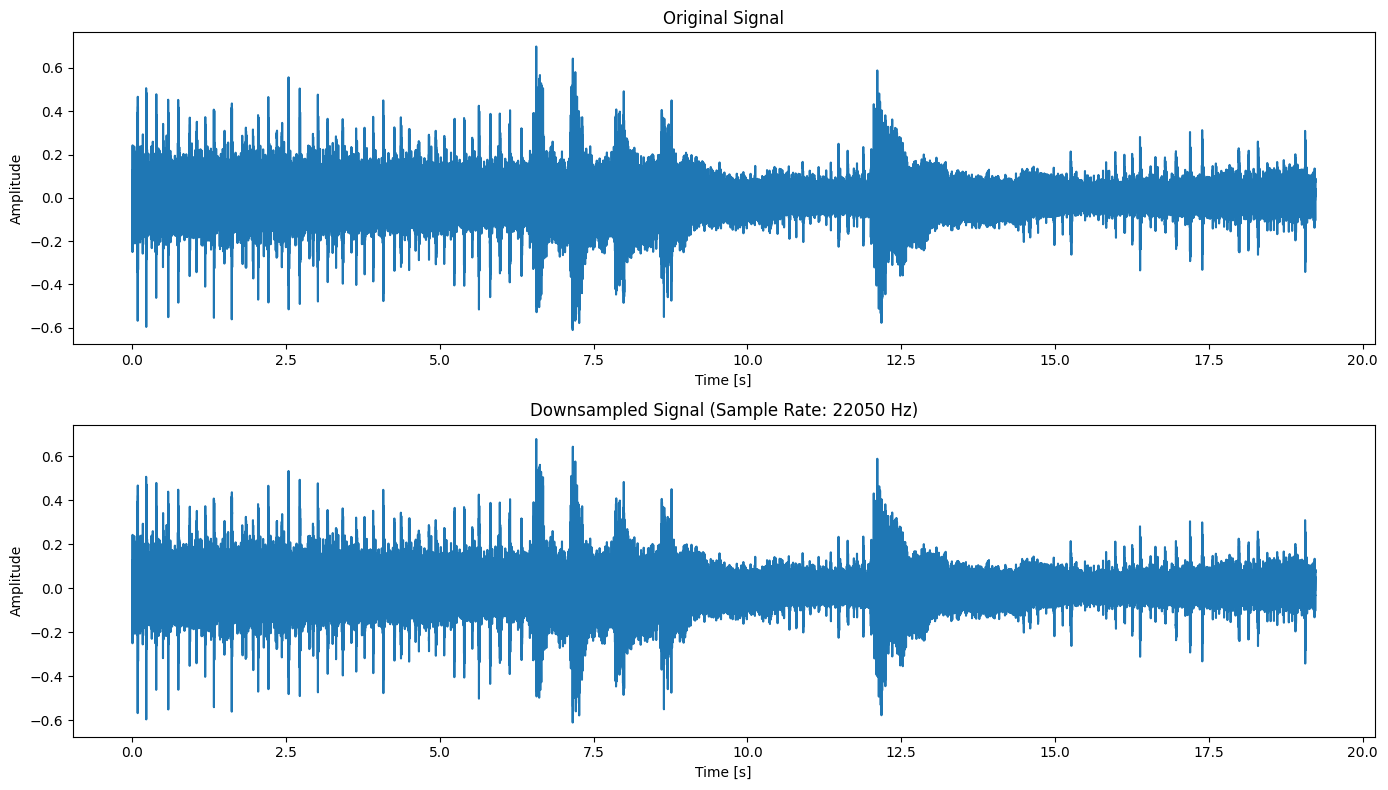

In [31]:
# Vergleich der Adiosignale
def plot_signals(original, downsampled, sr, downsampled_sr):
    time_original = np.linspace(0, len(original) / sr, len(original))
    time_downsampled = np.linspace(0, len(downsampled) / downsampled_sr, len(downsampled))
    
    plt.figure(figsize=(14, 8))
    
    plt.subplot(2, 1, 1)
    plt.plot(time_original, original)
    plt.title("Original Signal")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    
    plt.subplot(2, 1, 2)
    plt.plot(time_downsampled, downsampled)
    plt.title(f"Downsampled Signal (Sample Rate: {downsampled_sr} Hz)")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    
    plt.tight_layout()
    plt.show()

plot_signals(audio_2, audio_2_downsampled, sample_rate_2, int(nyquist_freq))

In [32]:
# Audio speichern
write('audio_2_downsampled.wav', int(nyquist_freq), (audio_2_downsampled * 32767).astype(np.int16))

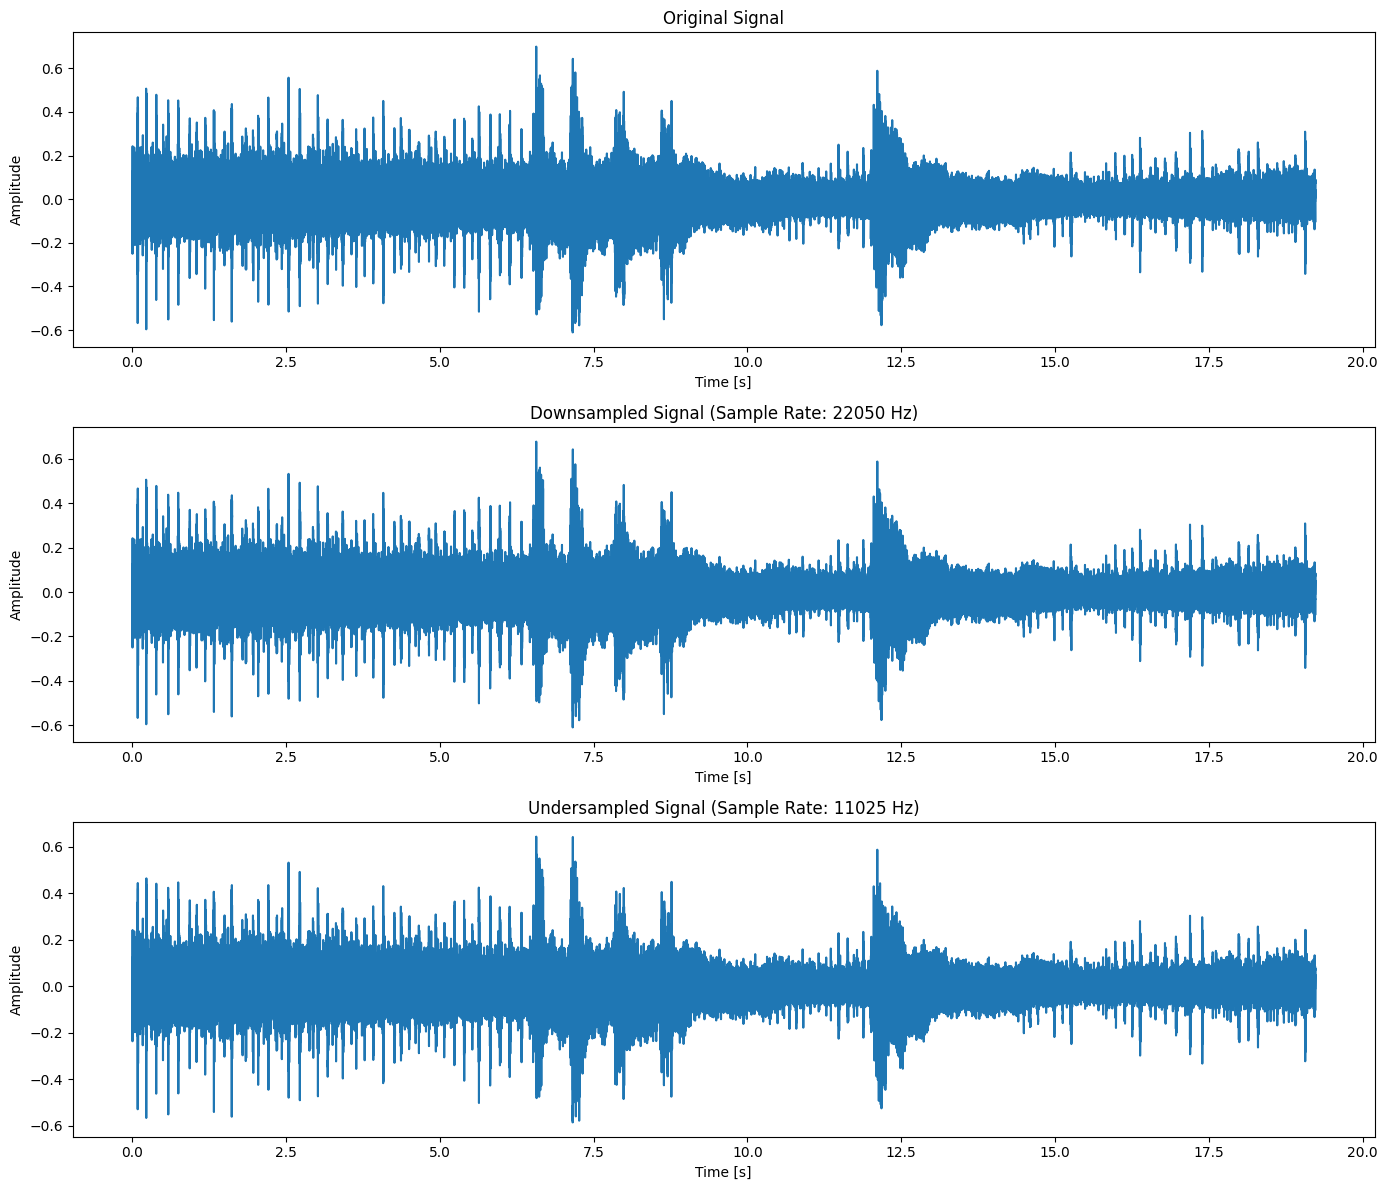

In [33]:
# target sample rate verändern
aliasing_sample_rate = int(nyquist_freq / 2) 

undersampled_signal = downsample_audio(audio_2, sample_rate_2, aliasing_sample_rate)

# Verlgiech der Audiosignale
def plot_signals_comparison(original, downsampled, undersampled, sr, downsampled_sr, undersampled_sr):
    time_original = np.linspace(0, len(original) / sr, len(original))
    time_downsampled = np.linspace(0, len(downsampled) / downsampled_sr, len(downsampled))
    time_undersampled = np.linspace(0, len(undersampled) / undersampled_sr, len(undersampled))
    
    plt.figure(figsize=(14, 12))
    
    plt.subplot(3, 1, 1)
    plt.plot(time_original, original)
    plt.title("Original Signal")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    
    plt.subplot(3, 1, 2)
    plt.plot(time_downsampled, downsampled)
    plt.title(f"Downsampled Signal (Sample Rate: {downsampled_sr} Hz)")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    
    plt.subplot(3, 1, 3)
    plt.plot(time_undersampled, undersampled)
    plt.title(f"Undersampled Signal (Sample Rate: {undersampled_sr} Hz)")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    
    plt.tight_layout()
    plt.show()

plot_signals_comparison(audio_2, audio_2_downsampled, undersampled_signal, sample_rate_2, int(nyquist_freq), aliasing_sample_rate)

In dem Zeitverlaufplot der Signale sind visuell kaum Unterschiede erkennbar, da die Signale in den niedrigeren Frequenzbereichen, die in den Zeitplots dominieren, sehr ähnlich bleiben. Dies liegt daran, dass auch bei niedrigerer Abtastrate die wesentlichen tieferen Frequenzanteile noch erhalten bleiben, die im Zeitbereich den größten Einfluss haben.

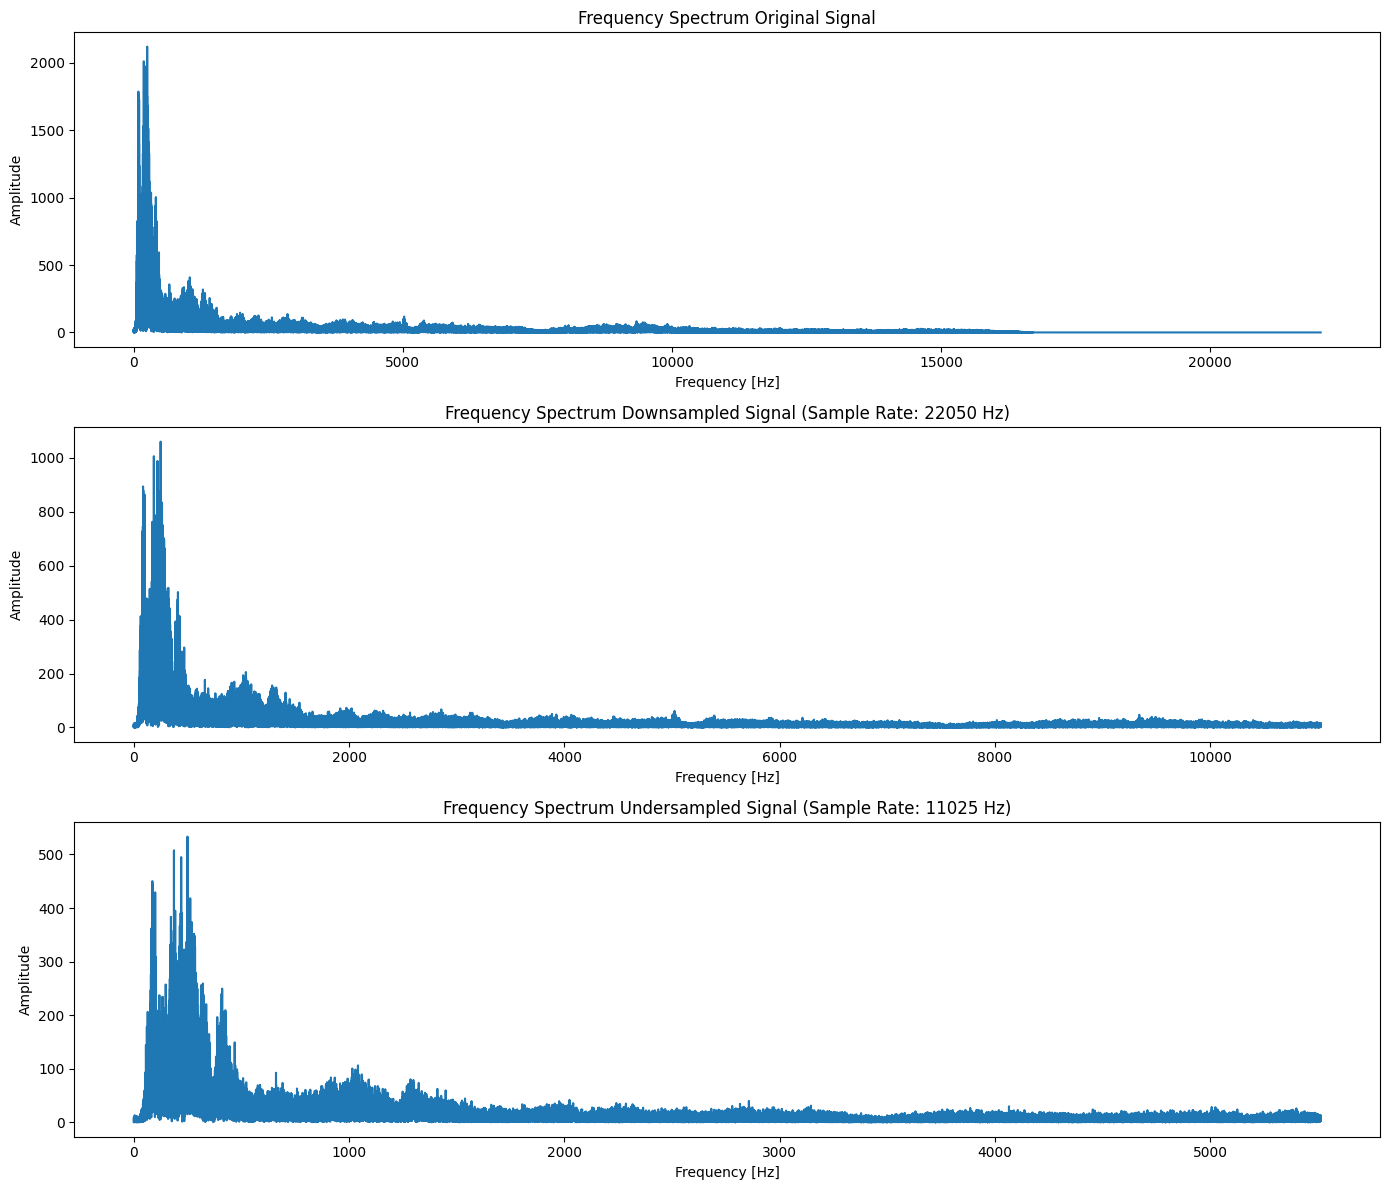

In [34]:
# Frequenzvergleich
def plot_frequency_comparison(original, downsampled, undersampled, sr, downsampled_sr, undersampled_sr):
    N_original = len(original)
    N_downsampled = len(downsampled)
    N_undersampled = len(undersampled)
    
    # Vergleich
    yf_original = fft(original)
    yf_downsampled = fft(downsampled)
    yf_undersampled = fft(undersampled)
    
    xf_original = fftfreq(N_original, 1 / sr)[:N_original // 2]
    xf_downsampled = fftfreq(N_downsampled, 1 / downsampled_sr)[:N_downsampled // 2]
    xf_undersampled = fftfreq(N_undersampled, 1 / undersampled_sr)[:N_undersampled // 2]
    
    plt.figure(figsize=(14, 12))
    
    plt.subplot(3, 1, 1)
    plt.plot(xf_original, np.abs(yf_original[:N_original // 2]))
    plt.title("Frequency Spectrum Original Signal")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")
    
    plt.subplot(3, 1, 2)
    plt.plot(xf_downsampled, np.abs(yf_downsampled[:N_downsampled // 2]))
    plt.title(f"Frequency Spectrum Downsampled Signal (Sample Rate: {downsampled_sr} Hz)")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")
    
    plt.subplot(3, 1, 3)
    plt.plot(xf_undersampled, np.abs(yf_undersampled[:N_undersampled // 2]))
    plt.title(f"Frequency Spectrum Undersampled Signal (Sample Rate: {undersampled_sr} Hz)")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")
    
    plt.tight_layout()
    plt.show()

plot_frequency_comparison(audio_2, audio_2_downsampled, undersampled_signal, sample_rate_2, int(nyquist_freq), aliasing_sample_rate)


In [35]:
# Audio abspielen
sd.play(audio_2, samplerate=sample_rate_2)
sd.wait()

sd.play(audio_2_downsampled, samplerate=int(nyquist_freq))
sd.wait()

sd.play(undersampled_signal, samplerate=aliasing_sample_rate)
sd.wait()

In den Frequenzbereichsdarstellungen sieht man, dass das Originalsignal einige hohe Frequenzen aufweist, welche leicht verloren gehen bei dem downsampelten Signal.
Besonders das untersampelte Signal zeigt eine deutlich reduzierte Frequenzbandbreite und mögliche Alias-Effekte, was auf einen erheblichen Informationsverlust hinweist (dies wiederspiegelt sich auch in der Audio).

#### Auswertung Nyguist-Theorem

Beim Originalsignal mit 44.100 Hz Sampling-Rate ist die Nyquist-Frequenz 22.050 Hz. Das bedeutet, dass Frequenzen bis zu 22.050 Hz korrekt dargestellt werden können, und es gibt keine Verzerrung (Aliasing). Dieses Signal ist theoretisch qualitativ einwandfrei.
Da Frequenzen oberhalb von 22.050 Hz nicht mehr korrekt dargestellt werden können, werden sie entweder weggefiltert oder es treten Artefakte auf, aber das Signal wirkt für normale Sprach- oder Musikaufnahmen oft noch „qualitativ gut“, da menschliches Hören Frequenzen oberhalb von etwa 20 kHz nicht mehr wahrnimmt.

Beim Undersampling auf 11.025 Hz führt es zu extremen Verzerrungen. Dies führt zu einem qualitativ unzureichenden Signal, da Frequenzen oberhalb der Nyquist-Frequenz nicht mehr korrekt erfasst werden.

In meinem Beispiel sind jedoch die dominanten Frequenzen die ganz Hohen, weshalb es schon bei der Nyguist-Frequenz zu einem Informationsverlust kommt.

#### Schlussbewertung Nyguist-Theorem

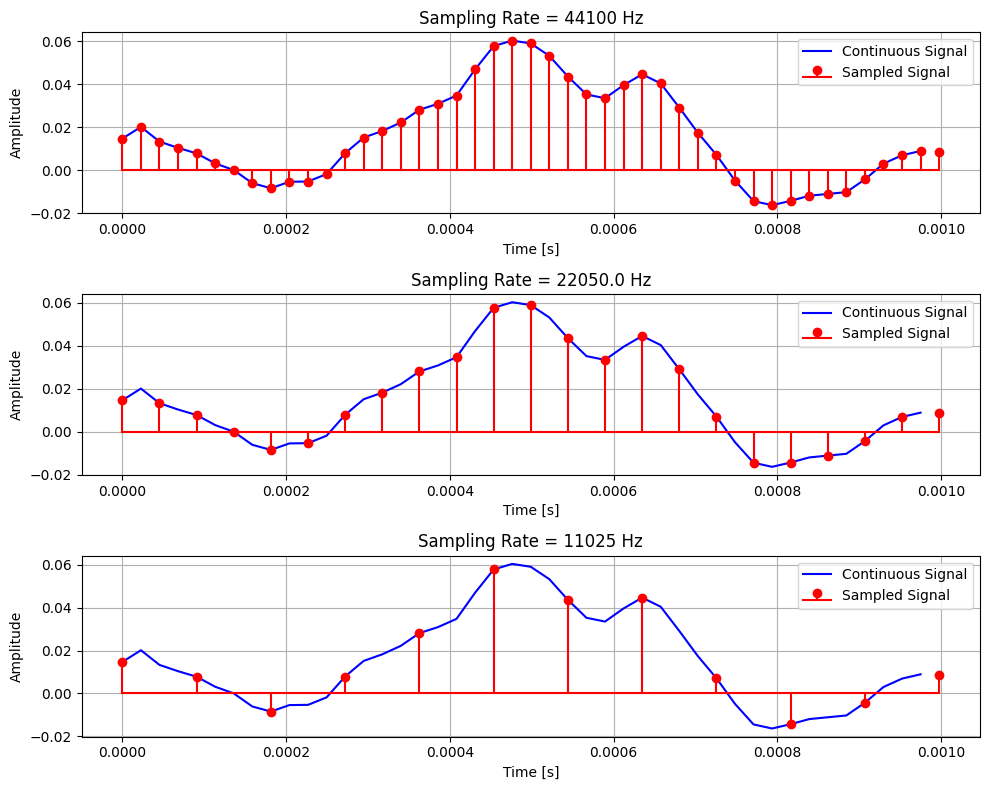

In [47]:
# Plot sample time
sample_rates = [sample_rate_2, nyquist_freq, aliasing_sample_rate]
duration = len(audio_2) / sample_rate_2
t_continuous = np.linspace(0, duration, len(audio_2))
zoom_time = 0.001
zoom_samples = int(zoom_time * sample_rate_2)

plt.figure(figsize=(10, 8))

for i, sample_rate in enumerate(sample_rates, 1):
    # Diskretisierte Zeitpunkte und Signal für die aktuelle Abtastrate
    step_size = int(sample_rate_2 / sample_rate) 
    t_samples = t_continuous[::step_size]
    signal_samples = audio_2[::step_size]
    
    # Zoom: Zeit und Signale beschränken auf den Anfang (0.05 Sekunden)
    t_continuous_zoom = t_continuous[:zoom_samples]
    audio_2_zoom = audio_2[:zoom_samples]
    t_samples_zoom = t_samples[t_samples < zoom_time]
    signal_samples_zoom = signal_samples[:len(t_samples_zoom)]
    
    # Plot des kontinuierlichen Signals (gezoomt)
    plt.subplot(len(sample_rates), 1, i)
    plt.plot(t_continuous_zoom, audio_2_zoom, label='Continuous Signal', color='blue')
    
    # Plot des diskreten Signals (Sample-Punkte, gezoomt)
    plt.stem(t_samples_zoom, signal_samples_zoom, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled Signal')
    
    plt.title(f'Sampling Rate = {sample_rate} Hz')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Der Code wurde mit Copilot verbessert und angepasst

Die Diagramme zeigen gut, wie das Signal bei verschiedenen Samplingraten aussieht. Die rote Linie mit den Punkten repräsentiert die abgetasteten Signale, während die blaue Linie das kontinuierliche Signal ist. Bei dem Originalen SIgnal sind genügend Daten vorhanden, um das Signal sehr gut darzustellen. Wenn die Samplingrate jedoch reduziert wird, ist ein sichtbarer Informationsverlust zu erkennen, was zeigt, dass nicht mehr genügend Abtastpunkte vorhanden sind, um das Signal korrekt zu rekonstruieren.

Die Parametervariation zeigt klar die Veränderungen im Signal. Es wäre sinnvoll gewesen, eine genauere Analyse durchzuführen, um die genaue Samplingrate zu bestimmen, bei der keine wesentlichen Informationen mehr verloren gehen. In diesem Fall hat die Nyquist-Frequenz nicht ausgereicht, um die Signalcharakteristika richtig zu erfassen, weil das Signal sehr hohe Frequenzen enthält, die bei den niedrigeren Samplingraten nicht mehr korrekt dargestellt werden können. Ein Test mit verschiedenen Signaltypen oder eine genauere Anpassung der Samplingrate hätte helfen können, den Punkt zu bestimmen, ab dem keine signifikanten Informationen mehr verloren gehen.

In [39]:
statistiken_zweitakt = berechne_statistische_kennwerte(audio_2, 'Original')
statistiken_zweitakt_down = berechne_statistische_kennwerte(audio_2_downsampled, 'Nyguist-Frequenz')
statistiken_zweitakt_undersampled = berechne_statistische_kennwerte(undersampled_signal, 'Aliasing-Frequenz')


df_statistiken = pd.DataFrame([statistiken_zweitakt, statistiken_zweitakt_down, statistiken_zweitakt_undersampled])
df_statistiken

Name  Mittelwert  Standardabweichung   Varianz   Maximum  \
0           Original    0.000006            0.077945  0.006075  0.698884   
1   Nyguist-Frequenz    0.000006            0.077946  0.006076  0.678032   
2  Aliasing-Frequenz    0.000003            0.077864  0.006063  0.644644   

    Minimum    Median  Kurtosis  Skewness  
0 -0.610567 -0.000405  4.031191  0.010976  
1 -0.610567 -0.000399  4.034534  0.010885  
2 -0.585668 -0.000385  3.985721  0.000924

Bei der Nyquist-Frequenz sind die Kennzahlen dem Originalsignal sehr ähnlich, was bedeutet, dass die Abtastrate hoch genug ist, um das Signal weitgehend korrekt zu erfassen.
Bei der Aliasing-Frequenz zeigen sich jedoch Unterschiede, besonders bei den Maximal- und Minimalwerten sowie bei der Kurtosis und Skewness. Diese Unterschiede deuten darauf hin, dass Informationen verloren gehen. Dies bestätigt auch meine vorherigen Analysen.

Obwohl ich mich an die Nyquist-Frequenz halten, sind aufgrund von dominanten hohen Frequenzen und Aliasing-Effekten trotzdem Informationen verloren gehen. Ein Anti-Aliasing-Filter oder eine noch höhere Samplingrate wäre sinnvoll gewesen, um zu verhindern, dass diese hohen Frequenzen falsch abgetastet oder komplett ausgelassen werden. Das andere Signal (4-Takt Motor) oder eine genauere Anpassung der Samplingrate hätte geholfen, den Punkt zu bestimmen, ab dem keine Informationen mehr verloren gehen.

Um die Kapazität in meinem digitalen Fotobuch zu minimieren, muss ich also die Pixelanzahl all meiner Bild möglichst gering halten und dafür den originalen Sound behalten.

(Der Text wurde mit Perplexity auf korrektheit überprüft und verbessert)